## Import needed libraries

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read data

In [296]:
data_types = {
    'Store': 'int16',
    'DayOfWeek': 'int8',
    'Sales': 'float32',
    'Open': 'bool',
    'Promo': 'bool',
    'StateHoliday': 'category',
    'SchoolHoliday': 'int8',
    'StoreType': 'category',
    'Assortment': 'category',
    'CompetitionDistance': 'float32',
    'CompetitionOpenSinceMonth': 'float32',
    'CompetitionOpenSinceYear': 'float32',
    'Promo2': 'bool',
    'Promo2SinceWeek': 'float32',
    'Promo2SinceYear': 'float32',
    'PromoInterval': 'category'}

In [297]:
data = pd.read_csv(
    "../Data/preprocessed_data/merged_data_before_preprocessing/merged_training_data.csv",
    parse_dates=['Date'],
    index_col='Date_index',
    encoding="utf-8",
    dtype=data_types)
data.head()

,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date_index,,,,,,,,,,,,,,,,,
2015-07-31,1,5,2015-07-31,5263.0,True,True,0,1,c,a,1270.0,9.0,2008.0,False,NaN,NaN,NaN
2015-07-31,2,5,2015-07-31,6064.0,True,True,0,1,a,a,570.0,11.0,2007.0,True,13.0,2010.0,"Jan,Apr,Jul,Oct"
2015-07-31,3,5,2015-07-31,8314.0,True,True,0,1,a,a,14130.0,12.0,2006.0,True,14.0,2011.0,"Jan,Apr,Jul,Oct"
2015-07-31,4,5,2015-07-31,13995.0,True,True,0,1,c,c,620.0,9.0,2009.0,False,NaN,NaN,NaN
2015-07-31,5,5,2015-07-31,4822.0,True,True,0,1,a,a,29910.0,4.0,2015.0,False,NaN,NaN,NaN


## Data Exploration & data cleaning

In [298]:
data.shape

(1017209, 17)

In [299]:
data.dtypes

Store                                 int16
DayOfWeek                              int8
Date                         datetime64[ns]
Sales                               float32
Open                                   bool
Promo                                  bool
StateHoliday                       category
SchoolHoliday                          int8
StoreType                          category
Assortment                         category
CompetitionDistance                 float32
CompetitionOpenSinceMonth           float32
CompetitionOpenSinceYear            float32
Promo2                                 bool
Promo2SinceWeek                     float32
Promo2SinceYear                     float32
PromoInterval                      category
dtype: object

In [300]:
# data['Promo2'] = data['Promo2'].astype('bool')

Rearrange the dataframe

In [301]:
data = data[[
    "Store", "Open", "Date", "DayOfWeek",
    "CompetitionDistance",
    "CompetitionOpenSinceMonth",
    "CompetitionOpenSinceYear",
    "StateHoliday", "SchoolHoliday",
    "Promo", "Promo2", "Promo2SinceYear",
    "Promo2SinceWeek", "PromoInterval",
    "StoreType", "Assortment", "Sales"
    
]]

In [302]:
data.head()

,Store,Open,Date,DayOfWeek,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,StateHoliday,SchoolHoliday,Promo,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval,StoreType,Assortment,Sales
Date_index,,,,,,,,,,,,,,,,,
2015-07-31,1,True,2015-07-31,5,1270.0,9.0,2008.0,0,1,True,False,NaN,NaN,NaN,c,a,5263.0
2015-07-31,2,True,2015-07-31,5,570.0,11.0,2007.0,0,1,True,True,2010.0,13.0,"Jan,Apr,Jul,Oct",a,a,6064.0
2015-07-31,3,True,2015-07-31,5,14130.0,12.0,2006.0,0,1,True,True,2011.0,14.0,"Jan,Apr,Jul,Oct",a,a,8314.0
2015-07-31,4,True,2015-07-31,5,620.0,9.0,2009.0,0,1,True,False,NaN,NaN,NaN,c,c,13995.0
2015-07-31,5,True,2015-07-31,5,29910.0,4.0,2015.0,0,1,True,False,NaN,NaN,NaN,a,a,4822.0


In [303]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int16         
 1   Open                       1017209 non-null  bool          
 2   Date                       1017209 non-null  datetime64[ns]
 3   DayOfWeek                  1017209 non-null  int8          
 4   CompetitionDistance        1014567 non-null  float32       
 5   CompetitionOpenSinceMonth  693861 non-null   float32       
 6   CompetitionOpenSinceYear   693861 non-null   float32       
 7   StateHoliday               1017209 non-null  category      
 8   SchoolHoliday              1017209 non-null  int8          
 9   Promo                      1017209 non-null  bool          
 10  Promo2                     1017209 non-null  bool          
 11  Promo2SinceYear            509

### Inspecting Target column

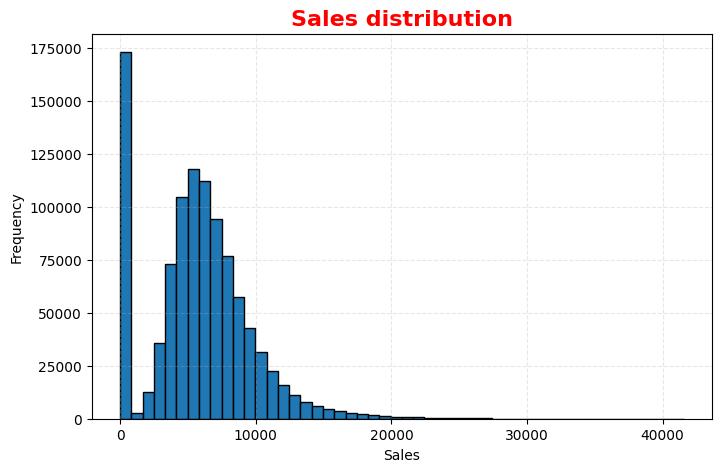

In [304]:
plt.figure(figsize=(8, 5))
plt.hist(data['Sales'], bins=50, edgecolor='k')
plt.title("Sales distribution", fontsize=16, fontweight='bold', c = 'red')
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

There are a lot of days that sales = zero what affect Normal distribution and most of machine learning models assume normality so we try to handle it

---
#### Handling Open feature
- All sales while open = 0 (the store closed) sales = 0 it makes sense and this what affects the normal distribution of sales
- There are some outliers where the store is open, but sales zero it can be data entry error or open for employees closed for customers
- I can conclude with 100% certainty that if it's closed sales will be zero!
- I found that open column is not statistical significant so I can drop it

In [305]:
data[data["Open"] == 0]["Sales"].sum()

np.float32(0.0)

In [306]:
data[data["Open"] == 0].shape[0]

172817

In [307]:
data[(data["Open"] == 1) & (data["Sales"] == 0)].shape[0]

54

In [308]:
data = data[(data.Open == 1) & (data.Sales > 0)]

In [309]:
data.duplicated().sum()

np.int64(0)

Checking the effects of removing closed days

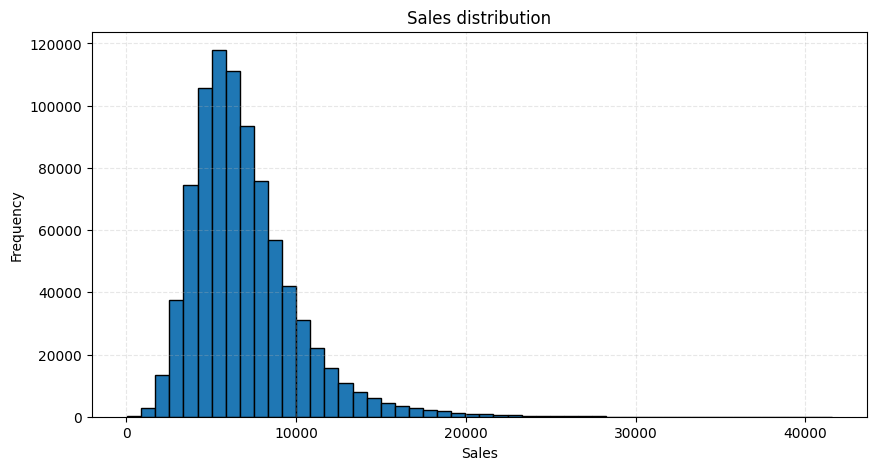

In [310]:
plt.figure(figsize=(10, 5))
plt.hist(data["Sales"], bins=50, color='C0', edgecolor='k')
plt.title("Sales distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Data now tends more to apply normal distribution but it still have some outliers 

In [311]:
data["Sales"].quantile(0.99) # 99th percentile of sales is 18k!
## show me the data in the last 1% of sales
data[data["Sales"] > data["Sales"].quantile(0.99)].sort_values("Sales", ascending=False).head(10)

,Store,Open,Date,DayOfWeek,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,StateHoliday,SchoolHoliday,Promo,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval,StoreType,Assortment,Sales
Date_index,,,,,,,,,,,,,,,,,
2015-06-22,909,True,2015-06-22,1,1680.0,NaN,NaN,0,0,False,True,2009.0,45.0,"Feb,May,Aug,Nov",a,c,41551.0
2015-04-03,262,True,2015-04-03,5,1180.0,5.0,2013.0,b,0,True,False,NaN,NaN,NaN,b,a,38722.0
2015-05-01,262,True,2015-05-01,5,1180.0,5.0,2013.0,a,0,True,False,NaN,NaN,NaN,b,a,38484.0
2015-05-14,262,True,2015-05-14,4,1180.0,5.0,2013.0,a,1,False,False,NaN,NaN,NaN,b,a,38367.0
2014-06-16,57,True,2014-06-16,1,420.0,6.0,2014.0,0,0,True,False,NaN,NaN,NaN,d,c,38037.0
2013-12-16,817,True,2013-12-16,1,140.0,3.0,2006.0,0,0,True,False,NaN,NaN,NaN,a,a,38025.0
2013-12-16,261,True,2013-12-16,1,15340.0,4.0,2015.0,0,0,True,True,2009.0,39.0,"Jan,Apr,Jul,Oct",d,c,37646.0
2014-05-29,262,True,2014-05-29,4,1180.0,5.0,2013.0,a,0,False,False,NaN,NaN,NaN,b,a,37403.0
2013-12-22,262,True,2013-12-22,7,1180.0,5.0,2013.0,0,0,False,False,NaN,NaN,NaN,b,a,37376.0


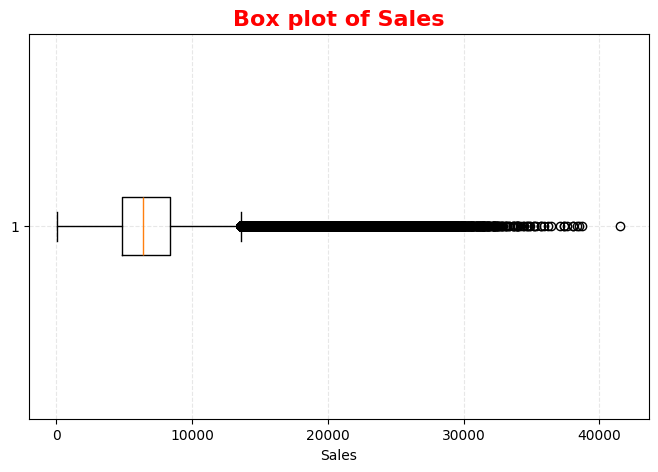

In [312]:
# check outliers in sales using matplot box plot
plt.figure(figsize=(8, 5))
plt.boxplot(data["Sales"], vert=False)
plt.title("Box plot of Sales", fontsize=16, fontweight='bold', c = 'red')
plt.xlabel("Sales")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

n = 844,338, mean = 6955.9585, sd = 3103.8157


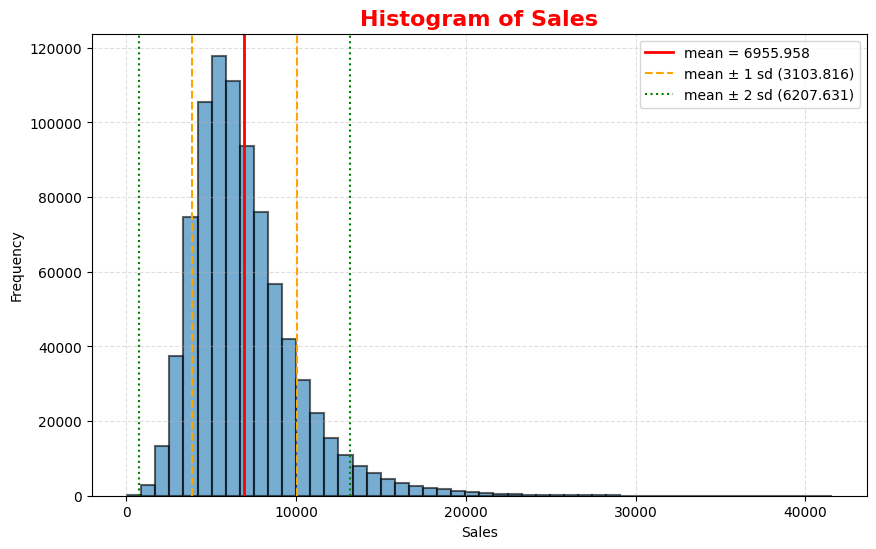

In [313]:
sales = data["Sales"].copy()
label = "Sales"

n = len(sales)
mean = sales.mean()
sd = sales.std(ddof=1)

plt.figure(figsize=(10, 6))
plt.hist(sales, bins=50, color="C0", edgecolor="k", alpha=0.6, density=False, linewidth=1.5)
plt.axvline(mean, color="red", linestyle="-", linewidth=2, label=f"mean = {mean:.3f}")
plt.axvline(
    mean - sd,
    color="orange",
    linestyle="--",
    linewidth=1.5,
    label=f"mean ± 1 sd ({sd:.3f})",
)
plt.axvline(mean + sd, color="orange", linestyle="--", linewidth=1.5)
plt.axvline(
    mean - 2 * sd,
    color="green",
    linestyle=":",
    linewidth=1.5,
    label=f"mean ± 2 sd ({2*sd:.3f})",
)
plt.axvline(mean + 2 * sd, color="green", linestyle=":", linewidth=1.5)
plt.title(f"Histogram of {label}", fontsize=16, fontweight="bold", c = 'red')
plt.xlabel(label)
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()

print(f"n = {n:,}, mean = {mean:.4f}, sd = {sd:.4f}")

n = 844,338, mean = 8.7576, sd = 0.4253


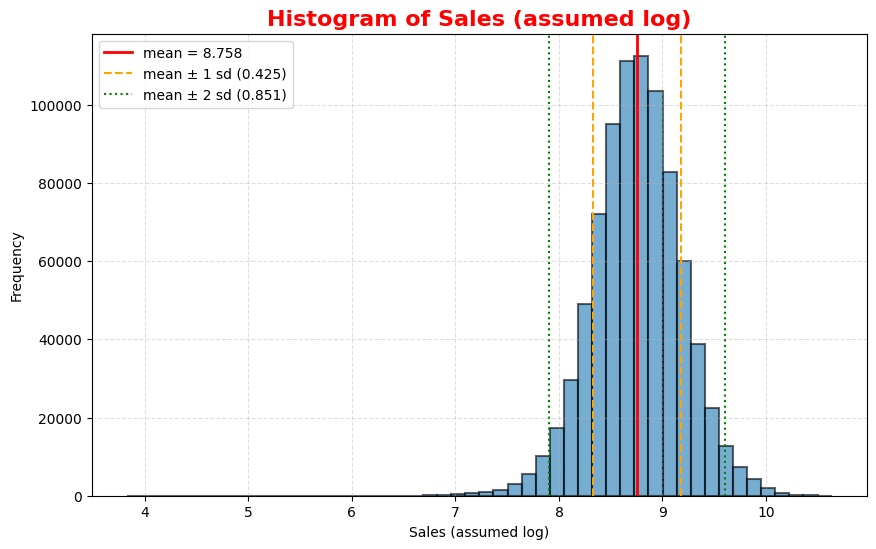

In [314]:
sales = np.log(data['Sales'].copy())
label = "Sales (assumed log)"

n = len(sales)
mean = sales.mean()
sd = sales.std(ddof=1)

plt.figure(figsize=(10, 6))
plt.hist(sales, bins=50, color='C0', edgecolor='k', alpha=0.6, density=False, linewidth=1.5)
plt.axvline(mean, color='red', linestyle='-', linewidth=2, label=f"mean = {mean:.3f}")
plt.axvline(mean - sd, color='orange', linestyle='--', linewidth=1.5, label=f"mean ± 1 sd ({sd:.3f})")
plt.axvline(mean + sd, color='orange', linestyle='--', linewidth=1.5)
plt.axvline(mean - 2*sd, color='green', linestyle=':', linewidth=1.5, label=f"mean ± 2 sd ({2*sd:.3f})")
plt.axvline(mean + 2*sd, color='green', linestyle=':', linewidth=1.5)
plt.title(f"Histogram of {label}", fontsize=16, fontweight='bold', c = 'red')
plt.xlabel(label)
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()

print(f"n = {n:,}, mean = {mean:.4f}, sd = {sd:.4f}")

In [315]:
del sales

In [316]:
data['Sales'] = np.log(data['Sales'])

- Now we can say that sales follow normal distribution 😊
- Note: we will reverse the log after prediction! lets work on the other columns too!

---

In [317]:
data.head()

,Store,Open,Date,DayOfWeek,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,StateHoliday,SchoolHoliday,Promo,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval,StoreType,Assortment,Sales
Date_index,,,,,,,,,,,,,,,,,
2015-07-31,1,True,2015-07-31,5,1270.0,9.0,2008.0,0,1,True,False,NaN,NaN,NaN,c,a,8.568457
2015-07-31,2,True,2015-07-31,5,570.0,11.0,2007.0,0,1,True,True,2010.0,13.0,"Jan,Apr,Jul,Oct",a,a,8.710125
2015-07-31,3,True,2015-07-31,5,14130.0,12.0,2006.0,0,1,True,True,2011.0,14.0,"Jan,Apr,Jul,Oct",a,a,9.025696
2015-07-31,4,True,2015-07-31,5,620.0,9.0,2009.0,0,1,True,False,NaN,NaN,NaN,c,c,9.546455
2015-07-31,5,True,2015-07-31,5,29910.0,4.0,2015.0,0,1,True,False,NaN,NaN,NaN,a,a,8.480944


In [318]:
data.drop(columns="Open", inplace = True)

store - date - day of week - Sales

In [319]:
# StoreType - Assortment - StateHoliday - SchoolHoliday
data.StoreType.value_counts()

StoreType
a    457042
d    258768
c    112968
b     15560
Name: count, dtype: int64

In [320]:
data.Assortment.value_counts()
# Assortment - describes an assortment level: a = basic, b = extra, c = extended

Assortment
a    444875
c    391254
b      8209
Name: count, dtype: int64

In [321]:
data.StateHoliday.value_counts()

StateHoliday
0    843428
a       694
b       145
c        71
Name: count, dtype: int64

In [322]:
na_counts = data.isna().sum()
na_pct = (na_counts / len(data) * 100).round(2)
na_summary = pd.concat([na_counts, na_pct], axis=1, keys=["count", "percent"])
print(na_summary[na_summary["count"] > 0].sort_values("count", ascending=False))

                            count  percent
Promo2SinceWeek            423292    50.13
Promo2SinceYear            423292    50.13
PromoInterval              423292    50.13
CompetitionOpenSinceMonth  268600    31.81
CompetitionOpenSinceYear   268600    31.81
CompetitionDistance          2186     0.26


In [323]:
data[['Promo', 'Promo2', 'PromoInterval', 'Date', 'Promo2SinceWeek', 'Promo2SinceYear', 'Sales']].head()

,Promo,Promo2,PromoInterval,Date,Promo2SinceWeek,Promo2SinceYear,Sales
Date_index,,,,,,,
2015-07-31,True,False,NaN,2015-07-31,NaN,NaN,8.568457
2015-07-31,True,True,"Jan,Apr,Jul,Oct",2015-07-31,13.0,2010.0,8.710125
2015-07-31,True,True,"Jan,Apr,Jul,Oct",2015-07-31,14.0,2011.0,9.025696
2015-07-31,True,False,NaN,2015-07-31,NaN,NaN,9.546455
2015-07-31,True,False,NaN,2015-07-31,NaN,NaN,8.480944


In [324]:
data[data.Promo2 == False]["PromoInterval"].value_counts()

PromoInterval
Feb,May,Aug,Nov     0
Jan,Apr,Jul,Oct     0
Mar,Jun,Sept,Dec    0
Name: count, dtype: int64

In [325]:
data[data.Promo2 == False]["Promo2SinceWeek"].nunique()

0

So we can see that missing in Promo2 leads or causing missing in Promo2SinceWeek/year 
Missing is more than 50% so I can drop the column or keep it but label the missing as new class 
I can leave nan as it is but it maybe good with some models and bad for others so it's not recommended

In [326]:
data["PromoInterval"] = data["PromoInterval"].cat.add_categories("None")
data["PromoInterval"] = data["PromoInterval"].fillna("None")
data["Promo2SinceWeek"] = data["Promo2SinceWeek"].fillna(0)
data["Promo2SinceYear"] = data["Promo2SinceYear"].fillna(0)

Here I decided to fill null with very large number to consider it as there are no near competitors and created flag for missing parts

In [327]:
data.head()

,Store,Date,DayOfWeek,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,StateHoliday,SchoolHoliday,Promo,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval,StoreType,Assortment,Sales
Date_index,,,,,,,,,,,,,,,,
2015-07-31,1,2015-07-31,5,1270.0,9.0,2008.0,0,1,True,False,0.0,0.0,None,c,a,8.568457
2015-07-31,2,2015-07-31,5,570.0,11.0,2007.0,0,1,True,True,2010.0,13.0,"Jan,Apr,Jul,Oct",a,a,8.710125
2015-07-31,3,2015-07-31,5,14130.0,12.0,2006.0,0,1,True,True,2011.0,14.0,"Jan,Apr,Jul,Oct",a,a,9.025696
2015-07-31,4,2015-07-31,5,620.0,9.0,2009.0,0,1,True,False,0.0,0.0,None,c,c,9.546455
2015-07-31,5,2015-07-31,5,29910.0,4.0,2015.0,0,1,True,False,0.0,0.0,None,a,a,8.480944


In [328]:
data[data['CompetitionOpenSinceMonth'].isna() & data['CompetitionOpenSinceYear'].isna()].head()

,Store,Date,DayOfWeek,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,StateHoliday,SchoolHoliday,Promo,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval,StoreType,Assortment,Sales
Date_index,,,,,,,,,,,,,,,,
2015-07-31,12,2015-07-31,5,1070.0,NaN,NaN,0,1,True,True,2010.0,13.0,"Jan,Apr,Jul,Oct",a,c,9.100414
2015-07-31,13,2015-07-31,5,310.0,NaN,NaN,0,0,True,True,2009.0,45.0,"Feb,May,Aug,Nov",d,a,9.084890
2015-07-31,16,2015-07-31,5,3270.0,NaN,NaN,0,1,True,False,0.0,0.0,None,a,c,9.233177
2015-07-31,19,2015-07-31,5,3240.0,NaN,NaN,0,1,True,True,2011.0,22.0,"Mar,Jun,Sept,Dec",a,c,9.016027
2015-07-31,22,2015-07-31,5,1040.0,NaN,NaN,0,0,True,True,2012.0,22.0,"Jan,Apr,Jul,Oct",a,a,8.789660


Here its very important to be very caution when dealing with 30% missing of the column!!
And I found the most used and the most valuable approach is to fill the year with very old year
Taking the assumption that most or all the missing are with old ages we don't know when do it opened 

In [329]:
data["CompetitionDistanceMissing"] = np.where(data["CompetitionDistance"].isna(), 1, 0)
data['CompetitionDistance'] = data["CompetitionDistance"].fillna(data["CompetitionDistance"].median())
data["CompetitionOpenMissing"] = np.where(data["CompetitionOpenSinceMonth"].isna() | data["CompetitionOpenSinceYear"].isna(), 1, 0)
data['CompetitionOpenSinceYear'] = data["CompetitionOpenSinceYear"].fillna(1995)
data['CompetitionOpenSinceMonth'] = data["CompetitionOpenSinceMonth"].fillna(1)

In [330]:
data.head()

,Store,Date,DayOfWeek,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,StateHoliday,SchoolHoliday,Promo,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval,StoreType,Assortment,Sales,CompetitionDistanceMissing,CompetitionOpenMissing
Date_index,,,,,,,,,,,,,,,,,,
2015-07-31,1,2015-07-31,5,1270.0,9.0,2008.0,0,1,True,False,0.0,0.0,None,c,a,8.568457,0,0
2015-07-31,2,2015-07-31,5,570.0,11.0,2007.0,0,1,True,True,2010.0,13.0,"Jan,Apr,Jul,Oct",a,a,8.710125,0,0
2015-07-31,3,2015-07-31,5,14130.0,12.0,2006.0,0,1,True,True,2011.0,14.0,"Jan,Apr,Jul,Oct",a,a,9.025696,0,0
2015-07-31,4,2015-07-31,5,620.0,9.0,2009.0,0,1,True,False,0.0,0.0,None,c,c,9.546455,0,0
2015-07-31,5,2015-07-31,5,29910.0,4.0,2015.0,0,1,True,False,0.0,0.0,None,a,a,8.480944,0,0


In [331]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844338 entries, 2015-07-31 to 2013-01-01
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Store                       844338 non-null  int16         
 1   Date                        844338 non-null  datetime64[ns]
 2   DayOfWeek                   844338 non-null  int8          
 3   CompetitionDistance         844338 non-null  float32       
 4   CompetitionOpenSinceMonth   844338 non-null  float32       
 5   CompetitionOpenSinceYear    844338 non-null  float32       
 6   StateHoliday                844338 non-null  category      
 7   SchoolHoliday               844338 non-null  int8          
 8   Promo                       844338 non-null  bool          
 9   Promo2                      844338 non-null  bool          
 10  Promo2SinceYear             844338 non-null  float32       
 11  Promo2SinceWeek             844

In [332]:
data['CompetitionDistanceMissing'] = data['CompetitionDistanceMissing'].astype('bool')
data['CompetitionOpenMissing'] = data['CompetitionOpenMissing'].astype('bool')

In [333]:
data = data[
    [
        "Store",
        "Date",
        "DayOfWeek",
        "CompetitionDistance",
        "CompetitionOpenSinceMonth",
        "CompetitionOpenSinceYear",
        "CompetitionDistanceMissing",
        "CompetitionOpenMissing",
        "StateHoliday",
        "SchoolHoliday",
        "Promo",
        "Promo2",
        "Promo2SinceYear",
        "Promo2SinceWeek",
        "PromoInterval",
        "StoreType",
        "Assortment",
        "Sales",
    ]
]

In [334]:
data.shape

(844338, 18)

In [335]:
data.to_csv("../Data/preprocessed_data/cleaned_training_data.csv", index=True)